In [85]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
from imblearn.over_sampling import ADASYN 
from collections import Counter
import seaborn as sn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
 
from sklearn import metrics
from sklearn.metrics import confusion_matrix


%matplotlib inline
sn.set_style("dark")
sn.set_palette("colorblind")

In [86]:
df=pd.read_csv("train.csv")

In [87]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [88]:
print('The dataset contains {0} rows and {1} columns.'.format(df.shape[0], df.shape[1]))

The dataset contains 284807 rows and 31 columns.


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Text(0, 0.5, 'Frequency')

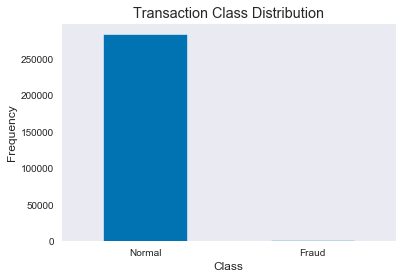

In [90]:
LABELS = ["Normal", "Fraud"]
h = pd.value_counts(df['Class'], sort = True)
h.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [91]:
print('Normal transactions count: ', df['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', df['Class'].value_counts().values[1])

Normal transactions count:  284315
Fraudulent transactions count:  492


In [92]:
X = df.iloc[:, :-1]

y = df['Class']

In [93]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=42)

In [95]:
data = ADASYN(random_state=42)
print('Original dataset shape {}'.format(Counter(y_train)))
X_res, y_res = data.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 190477, 1: 343})
Resampled dataset shape Counter({0: 190477, 1: 190471})


In [96]:
X_train, y_train = X_res, y_res 

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train);



In [97]:
modlist = [('LogisticRegression', logmodel)]

models = [j for j in modlist]

print()
print('========================== Model Evaluation Results ========================' "\n")  

#for i, v in models:
scores = cross_val_score(v, X_train, y_train, cv=10)
accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
classification = metrics.classification_report(y_train, v.predict(X_train))
print('===== {} ====='.format(i))
print()
print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
print() 
print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
print()
print("Confusion Matrix:" "\n", confusion_matrix)
print()
print("Classification Report:" "\n", classification) 
print()


========================== Model Evaluation Results ========================

===== LogisticRegression =====

Cross Validation Mean Score:  87.4%

Model Accuracy:  90.10000000000001%

Confusion Matrix:
 [[174116  16361]
 [ 21442 169029]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90    190477
           1       0.91      0.89      0.90    190471

    accuracy                           0.90    380948
   macro avg       0.90      0.90      0.90    380948
weighted avg       0.90      0.90      0.90    380948





========================== Model Test Results ========================

=== LogisticRegression ===
Model Accuracy:  91.2%

Confusion Matrix:
 [[85614  8224]
 [    7   142]]



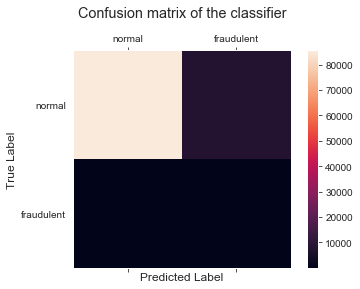

In [98]:
classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")   


accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
classification = metrics.classification_report(y_test, v.predict(X_test))   
print('=== {} ==='.format(i))
print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
print()
print("Confusion Matrix:" "\n", confusion_matrix)
print()

labels = ['normal', 'fraudulent'] 
fig = plt.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(confusion_matrix) 
plt.title('Confusion matrix of the classifier\n') 
fig.colorbar(cax) 
ax.set_xticklabels([''] + labels) 
ax.set_yticklabels([''] + labels) 
plt.xlabel('Predicted Label') 
plt.ylabel('True Label') 
plt.show()

